In [226]:
import glob
import json
from json import loads,dumps,load
import random
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.cluster import KElbowVisualizer
import networkx
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [204]:
def read_files(path,percent=10):
    files=glob.glob(path+'/**/**/**/*.json')
    print(len(files))
    files_sample=random.sample(files,int((percent/100)*len(files)))
    return files_sample

In [205]:
files_sample=read_files('/home/nithivarn/TextAnalytics/Project-2/CORD-19-research-challenge/',percent=1)

59311


In [207]:
len(files_sample)

593

In [208]:
def read_json(file):
    d = {}
    dic = loads(open(file).read())
    d["paper_id"]=dic["paper_id"]
    d["body_text"]=[]
    for item in dic["body_text"]:
        d["body_text"].append(item['text'])
    d["body_text"] = ''.join(d["body_text"])
    return d
    

In [212]:
def json_2_df_2_tokenizer(files):
    final_dict = {'paper_id':[],'body_text':[]}
    for file in files:
        d = read_json(file)
        final_dict['paper_id'].append(d['paper_id'])
        final_dict['body_text'].append(d['body_text'])
    df = pd.DataFrame.from_dict(final_dict)
    print(df)
    #indexes with empty bodytext
    indexes =df[df['body_text']==''].index
    #drop them
    df.drop(indexes,inplace=True)
    #print(df)
    normalize_function = np.vectorize(normalize_document)
    normalized_corpus = normalize_function(list(df['body_text']))
    print(normalized_corpus)
    cv = CountVectorizer()
    doc_matrix =cv.fit_transform(normalized_corpus)
    return doc_matrix,df

In [219]:
#using the yellow brick ELbowkneeVisulaizer
def determining_n_clusters(doc_matrix):
    model = KMeans()
    visualizer=KElbowVisualizer(model,k=(2,30))
    visualizer.fit(doc_matrix)
    visualizer.show()
    
    

In [223]:
def clustering_documents(n_clusters,doc_matrix,df):
    km = KMeans(n_clusters=n_clusters,max_iter=1000,random_state=42)
    km.fit(doc_matrix)
    print(km.labels_)
    df['KMeans_label']=list(km.labels_)
    print(df.info())
    clustered_docs = (df.sort_values(by=['KMeans_label']).groupby(['KMeans_label']))
    df_clustered=clustered_docs.apply(lambda x:x)
    print(df_clustered)
    # converting all clustered rows into dictionary
    dic_clusters_docs = {}
    for i in range(n_clusters):
        doc = []
        print(i)
        for d in df_clustered[df_clustered["KMeans_label"] == i]['body_text']:
            doc.append(d)
        print(len(doc))
        doc_string = ''.join(doc)
        #print(doc_string)
        dic_clusters_docs[i]=doc_string
    return dic_clusters_docs

In [1]:
def summarize_clusters(dic_clusters_docs):
    list_of_summaries=[]
    for (cluster_index,item) in dic_clusters_docs.items():
        list_of_summaries.append((cluster_index,summarize(item)))
    for cluster_index,summary in list_of_summaries:
        if not os.path.exists(os.getcwd()+"/"+"output"):
            os.mkdir("output")
        filename="SUMMARY-"+cluster_index+".MD"
        path = os.getcwd()+"/output/"+filename
        with open(path,"w") as f:
            f.write(''.join(summary))

In [15]:
df

,paper_id,body_text
0,8869bd83a3d8b813093f62f897c5478a96e311bf,Report 48 see https://www.who. int/docs/defaul...
1,d6a98a653f12caba3f539f01b0fd84b2ca4f1672,"Over the past few years, a new view of T cell ..."
2,ffb877d67fd30e14677580c292ca9caf64659987,In June 2015 the Healthcare Infection Society ...
3,PMC7008051,Respiratory syncytial virus (RSV) is well know...
4,PMC6609751,The adenovirus (HAdV) is a double-stranded DNA...
5,31fb22d877d6efa55e7c8261a59a1f0d35962829,rapid assessment of the impact of physical dis...
6,0738152fba8d21b4ae77293a3e2bfd5019a537a7,"1 18Giulia Polverari, MD 1 , Vincenzo Arena, M..."
7,PMC4217096,"Dear Editor,For decades, Ebola members (EBOV) ..."
8,6861259e73b53c482dea9ed97abad64f5c1c479a,M. genavense infections occur only rarely in p...
9,PMC3235500,Multiple sclerosis (MS) was initially identifi...


In [16]:
indexes =df[df['body_text']==''].index

In [17]:
df.drop(indexes,inplace=True)

In [18]:
df

,paper_id,body_text
0,8869bd83a3d8b813093f62f897c5478a96e311bf,Report 48 see https://www.who. int/docs/defaul...
1,d6a98a653f12caba3f539f01b0fd84b2ca4f1672,"Over the past few years, a new view of T cell ..."
2,ffb877d67fd30e14677580c292ca9caf64659987,In June 2015 the Healthcare Infection Society ...
3,PMC7008051,Respiratory syncytial virus (RSV) is well know...
4,PMC6609751,The adenovirus (HAdV) is a double-stranded DNA...
5,31fb22d877d6efa55e7c8261a59a1f0d35962829,rapid assessment of the impact of physical dis...
6,0738152fba8d21b4ae77293a3e2bfd5019a537a7,"1 18Giulia Polverari, MD 1 , Vincenzo Arena, M..."
7,PMC4217096,"Dear Editor,For decades, Ebola members (EBOV) ..."
8,6861259e73b53c482dea9ed97abad64f5c1c479a,M. genavense infections occur only rarely in p...
9,PMC3235500,Multiple sclerosis (MS) was initially identifi...


In [19]:
corpus = df['body_text'].values

In [20]:
type(corpus)

numpy.ndarray

In [21]:
corpus[2]

'In June 2015 the Healthcare Infection Society held a twoday Middle East Infection Prevention Summit with the aim of uniting colleagues across the globe in driving down infection rates and improving infection prevention and control practice. In many ways the Middle East is a microcosm for the challenges in infection prevention and control across the world. The economies range from underdeveloped countries such as Egypt, with a low per-capita gross domestic product, to the wealthy hydrocarbon-exporting, and increasingly diversified, economies of the Gulf Cooperation Council countries; of course these vast economic differences impact on the resources available for healthcare. Moreover, there are large ex-patriot populations in many Middle Eastern countries and international travel to and from the Middle East is frequent, meaning that infections emerging there can quickly have a global impact.Two of the themes of the conference that have particular international relevance are the huge cha

In [188]:
import re
import nltk
stop_words = nltk.corpus.stopwords.words('english')
other_stop_words = ['report','docs','document','fig','figure']
stop_words+=other_stop_words
def normalize_document(txt,lemmatize=True):
    txt=re.sub(r'(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+','',txt)
    txt = re.sub(r'[^a-zA-Z0-9\s]', '', txt,flags=re.I|re.A)
    txt = re.sub(r'[0-9]','',txt)
    txt = txt.lower()
    txt = txt.strip()
    txt = remove_stopwords(txt)
    if lemmatize:
            txt = lemmatize_text(txt)
    else:
        txt = txt
    return txt

In [189]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

In [190]:
def remove_stopwords(text):
    stopword_list = nltk.corpus.stopwords.words('english')
    other_stop_words = ['report','docs','document']
    stopword_list+=other_stop_words
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [191]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

In [192]:
def pos_tag_text(text):
    text = nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

In [193]:
def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None

In [194]:
def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    wnl = WordNetLemmatizer()
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                    
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [195]:
def normalize_corpus(corpus, lemmatize=True, tokenize=False):
    normalized_corpus = []    
    for text in corpus:
        text=re.sub(r'(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+','',text)
        text = text.lower()
        text = remove_stopwords(text)
        #print(type(text))
        #print(text)
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text,flags=re.I|re.A)
        text = re.sub(r'[0-9]','',text)
        if lemmatize:
            text = lemmatize_text(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
    return normalized_corpus

In [161]:
df

,paper_id,body_text,KMeans_label
0,8869bd83a3d8b813093f62f897c5478a96e311bf,Report 48 see https://www.who. int/docs/defaul...,0
1,d6a98a653f12caba3f539f01b0fd84b2ca4f1672,"Over the past few years, a new view of T cell ...",2
2,ffb877d67fd30e14677580c292ca9caf64659987,In June 2015 the Healthcare Infection Society ...,0
3,PMC7008051,Respiratory syncytial virus (RSV) is well know...,0
4,PMC6609751,The adenovirus (HAdV) is a double-stranded DNA...,3
5,31fb22d877d6efa55e7c8261a59a1f0d35962829,rapid assessment of the impact of physical dis...,4
6,0738152fba8d21b4ae77293a3e2bfd5019a537a7,"1 18Giulia Polverari, MD 1 , Vincenzo Arena, M...",0
7,PMC4217096,"Dear Editor,For decades, Ebola members (EBOV) ...",0
8,6861259e73b53c482dea9ed97abad64f5c1c479a,M. genavense infections occur only rarely in p...,0
9,PMC3235500,Multiple sclerosis (MS) was initially identifi...,1


In [142]:
import numpy as np

In [183]:
normalize_function = np.vectorize(normalize_document)

In [186]:
normalized_corpus = normalize_function(list(df['body_text']))

In [187]:
normalized_corpus

array(['see intdocsdefaultsource outbreak coronavirus disease covid cause severe acute respiratory syndrome coronavirus sarscov first report china december affect whole world march laboratoryconfirmed case deaths country sarscov rna first detect stool specimen first report covid case usa much attention pay study report gastrointestinal tract infection sarscov accord study include patient laboratoryconfirmed covid hospital china jan nausea vomit diarrhoea report patient autopsy study crucial help understand involvement covid digestive system however date one autopsy man age year covid show segmental dilatation stenosis small intestine whether find secondary covid preexist gastrointestinal comorbidity implication management patient preexist digestive disease indeed presence number comorbidities associate poorer clinical outcome patient covid study patient laboratoryconfirmed covid patient covid report least one comorbidity hypertension diabetes coronary heart disease common study patient

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
len(normalized_corpus)

10

In [29]:
cv = CountVectorizer()

In [30]:
doc_matrix = cv.fit_transform(normalized_corpus)

In [31]:
doc_matrix

<10x3426 sparse matrix of type '<class 'numpy.int64'>'
	with 5134 stored elements in Compressed Sparse Row format>

In [32]:
doc_matrix.shape

(10, 3426)

In [33]:
from sklearn.cluster import KMeans

# Silhoutte analysis

In [55]:
doc_matrix.toarray().shape

(10, 3426)

In [35]:
type(doc_matrix)

scipy.sparse.csr.csr_matrix

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

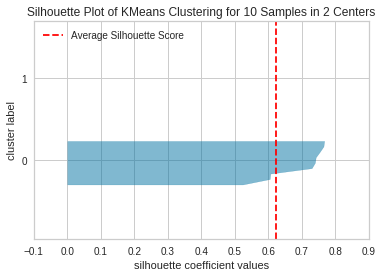

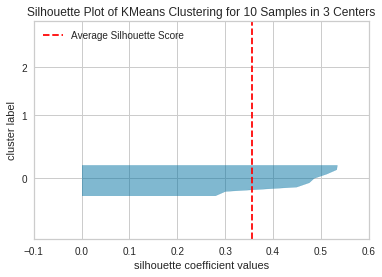

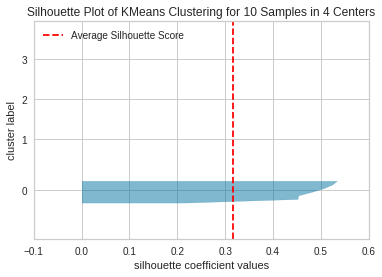

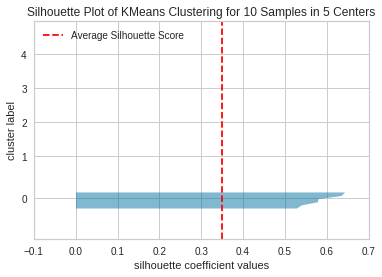

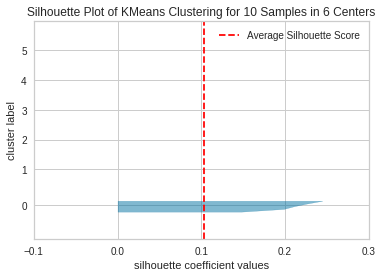

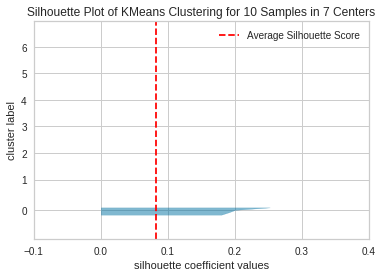

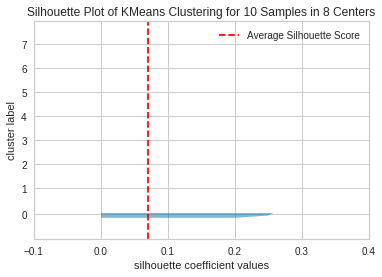

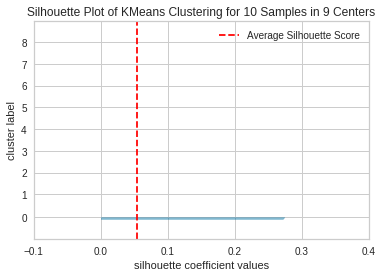

In [54]:
for n in range(2,doc_matrix.shape[0]):
    model = KMeans(n_clusters=n,random_state=42)
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(doc_matrix)
    visualizer.show()

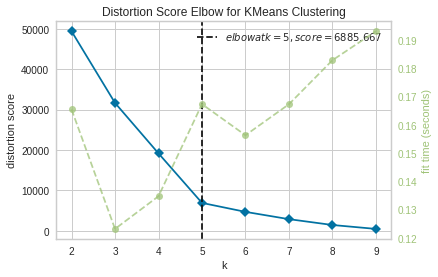

In [56]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer=KElbowVisualizer(model,k=(2,10))
visualizer.fit(doc_matrix)
visualizer.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
matrix_reduced= pca.fit_transform(doc_matrix.toarray())
matrix_reduced.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

(9, 6154)

(9, 6154)

In [57]:
num_clusters =5 

In [58]:
km = KMeans(n_clusters=num_clusters,max_iter=1000,random_state=42)

In [59]:
km.fit(doc_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [60]:
km.labels_


array([0, 2, 0, 0, 3, 4, 0, 0, 0, 1], dtype=int32)

In [62]:
len(km.labels_)

10

In [63]:
from collections import Counter

In [64]:
Counter(km.labels_)

Counter({0: 6, 2: 1, 3: 1, 4: 1, 1: 1})

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
paper_id     10 non-null object
body_text    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


In [66]:
df['KMeans_label']=list(km.labels_)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 3 columns):
paper_id        10 non-null object
body_text       10 non-null object
KMeans_label    10 non-null int64
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [68]:
clustered_docs = (df.sort_values(by=['KMeans_label']).groupby(['KMeans_label']))

In [69]:
df_clustered=clustered_docs.apply(lambda x:x)

In [70]:
df_clustered

,paper_id,body_text,KMeans_label
0,8869bd83a3d8b813093f62f897c5478a96e311bf,Report 48 see https://www.who. int/docs/defaul...,0
2,ffb877d67fd30e14677580c292ca9caf64659987,In June 2015 the Healthcare Infection Society ...,0
3,PMC7008051,Respiratory syncytial virus (RSV) is well know...,0
6,0738152fba8d21b4ae77293a3e2bfd5019a537a7,"1 18Giulia Polverari, MD 1 , Vincenzo Arena, M...",0
7,PMC4217096,"Dear Editor,For decades, Ebola members (EBOV) ...",0
8,6861259e73b53c482dea9ed97abad64f5c1c479a,M. genavense infections occur only rarely in p...,0
9,PMC3235500,Multiple sclerosis (MS) was initially identifi...,1
1,d6a98a653f12caba3f539f01b0fd84b2ca4f1672,"Over the past few years, a new view of T cell ...",2
4,PMC6609751,The adenovirus (HAdV) is a double-stranded DNA...,3
5,31fb22d877d6efa55e7c8261a59a1f0d35962829,rapid assessment of the impact of physical dis...,4


In [71]:
type(df_clustered[df_clustered["KMeans_label"] == 2][['paper_id','body_text']])

pandas.core.frame.DataFrame

In [72]:
df_new =df_clustered[df_clustered["KMeans_label"] == 2]

In [73]:
df_new[['paper_id','body_text']]

,paper_id,body_text
1,d6a98a653f12caba3f539f01b0fd84b2ca4f1672,"Over the past few years, a new view of T cell ..."


In [74]:
l=[]

In [77]:
for d in df_clustered[df_clustered["KMeans_label"] == 0]['body_text']:
    l.append(d)

In [78]:
l

['Over the past few years, a new view of T cell recognition has emerged. TCRs were previously thought of as simple \'on/off\' switches that were highly specific for a single \'foreign\' peptide. Numerous studies have now demonstrated different functional outcomes resulting from the engagement of the same TCR by different peptide ligands depending on whether a peptide acts as an agonist, partial agonist or antagonist of a TCR [1]. At the same time, it has been shown that several peptides that have relatively little primary sequence homology to each other can all act as agonists of the same TCR [2, 3] . The activation of autoreactive T cells by such pathogen-derived peptides that mimic self-peptides has been termed \'molecular mimicry\' [4, 5] . The emerging complexity of TCR recognition has important implications for understanding both self-tolerance and the pathogenesis of human autoimmune diseases. This review will discuss the structural requirements for the activation of autoreactive

In [129]:
dic_clusters_docs = {}
for i in range(num_clusters):
    doc = []
    print(i)
    for d in df_clustered[df_clustered["KMeans_label"] == i]['body_text']:
        doc.append(d)
    print(len(doc))
    doc_string = ''.join(doc)
    #print(doc_string)
    dic_clusters_docs[i]=doc_string


0
6
1
1
2
1
3
1
4
1


In [131]:
print(dic_clusters_docs[1])

Multiple sclerosis (MS) was initially identified in 1868 by Charcot. This disease often begins in young adulthood with intermittent episodes of neurological dysfunction, including visual impairment, ataxia, motor and sensory deficits, and bowel and bladder incontinence. These are attributable to recurrent inflammatory attacks on the white matter of the brain and spinal cord, which lead to the accumulation of perivascularly distributed inflammatory cells within the brain and spinal cord white matter [1].Beeton et al. first established an animal model of MS in the 1930s, when they immunized monkeys with a central nervous system (CNS) homogenate to induce what is now known as experimental autoimmune encephalomyelitis (EAE) [2]. Since this pilot animal study, EAE has become the most accepted animal model of MS. In recent decades, pathogenic hypotheses have been investigated and novel therapeutic agents tested in this model in the fields of CNS inflammation and demyelination. Therefore, EAE

In [99]:
def parse_document(document):
    document = re.sub('\n', ' ', document)
    if isinstance(document, str):
        document = document
    elif isinstance(document, unicode):
        return unicodedata.normalize('NFKD', document).encode('ascii','ignore')
    else:
        raise ValueError('Document is not string or unicode!')
    document = document.strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]
    #print(sentences)
    return sentences

In [81]:
I am ignoring contractions.

SyntaxError: invalid syntax (<ipython-input-81-8c930608761d>, line 1)

In [82]:
!type pip3


pip3 is /usr/bin/pip3


In [83]:

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

In [84]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

In [85]:
def remove_stopwords(text):
    stopword_list = nltk.corpus.stopwords.words('english')
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [86]:
def pos_tag_text(text):
    text = nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

In [87]:
def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None

In [88]:
def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    wnl = WordNetLemmatizer()
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                    
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [89]:
def normalize_corpus(corpus, lemmatize=True, tokenize=False):
    normalized_corpus = []    
    for text in corpus:
        text = text.lower()
        text = remove_stopwords(text)
        #print(type(text))
        #print(text)
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text,flags=re.I|re.A)
        text = re.sub(r'[0-9]','',text)
        if lemmatize:
            text = lemmatize_text(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
    return normalized_corpus

In [90]:
import networkx
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
def summarize(doc,n_top=10):
    sentences = parse_document(doc)
    print(len(sentences))
    norm_sentences = normalize_corpus(sentences)
    vectorizer = TfidfVectorizer(min_df=0)
    dt_matrix = vectorizer.fit_transform(norm_sentences)
    similarity_matrix = (dt_matrix*dt_matrix.T)
    similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
    networkx.draw_networkx(similarity_graph)
    scores = networkx.pagerank(similarity_graph)
    sentences_rank = sorted(((score,index) for index,score in scores.items()),reverse=True)
    #print(sentences_rank)
    top_indices =[sentences_rank[index][1] for index in range(n_top)]
    print(top_indices)
    summary=[sentences[index] for index in top_indices]
    #print(summary)
    return summary
    

In [133]:
l=[]

In [134]:
l.append((1,2))

In [135]:
l

[(1, 2)]

155
[51, 49, 75, 22, 7, 105, 8, 2, 43, 60]
['However, lower respiratory symptoms, such as wheeze, sputum, and hypoxemia, were only seen in patients with newly appearing findings on chest CT. Bacterial culture for respiratory specimens was performed in six cases, and bacteria were detected in three cases; however, no patient was diagnosed with bacterial pneumonia or treated with targeted antibiotics against these detected bacteria.', 'Five cases (63%) had newly appearing abnormal findings on chest CT; however, no abnormal findings were detected by chest X-ray in 3 of those 5 patients (60%).', 'The few reports of 18 F-FDG PET/CT in patients with COVID-19 currently available, describe in all cases symptomatic patients with common COVID-19 manifestation including fever, cough, shortness of breath, myalgia and fatigue (1, 2) .', '8 Furthermore, no patients with IBD with SARS-CoV-2 infection have been reported from the three largest tertiary IBD centres in Wuhan (Tongji Hospital, Union Hospi

[13, 50, 20, 34, 104, 56, 81, 43, 17, 46]
['This study is the first report of the outbreak of acute respiratory infection caused by adenovirus, occurred on school in Korea.On May 19, 2017, the cluster of acute respiratory infections due to adenovirus in the swimming department of a physical education school (School J) was reported to Korea Centers for Disease Control and Prevention (KCDC).', 'There were 14 identified cases in Study 2, and all of them were students.', 'As all students with respiratory symptoms were identified as members of the departments using the swimming pool (swimming and modern sports) at the on-site investigation performed on May 22, a retrospective cohort investigation (Study 1) was conducted instantaneously on 59 students and teachers who had been using the swimming pool.', 'In Study 1, a total of 33 cases were identified, of which 12 were confirmed cases and 21 were suspected cases and the attack rate was 55.9% (33/59).', 'Therefore, to identify the cause and t

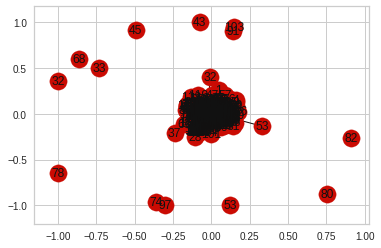

In [136]:
list_of_summaries=[]
for (cluster_index,item) in dic_clusters_docs.items():
    list_of_summaries.append((cluster_index,summarize(item)))

In [122]:
doc_s_added="Report 48 see https://www.who. int/docs/default-source/ coronaviruse/situationreports/20200308-sitrep-48covid-19.pdf?sfvrsn=16f7ccef_4The outbreak of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), first reported in China, in December, 2019, now affects the whole world. As of March 8, 2020, more than 105 000 laboratoryconfirmed cases and more than 3500 deaths in over 100 countries had been reported.Since SARS-CoV-2 RNA was first detected in a stool specimen of the first reported COVID-19 case in the USA, 1 much attention has been paid to the study and reporting of gastrointestinal tract infection of SARS-CoV-2. According to a study 2 including 1099 patients with laboratory-confirmed COVID-19 from 552 hospitals in China as of Jan 29, 2020, nausea or vomiting, or both, and diarrhoea were reported in 55 (5·6%) and 42 (3·8%) patients. Autopsy studies are crucial to help understand the involvement of COVID-19 in the digestive system; however, to date, there has been only one autopsy report 3 for a man aged 85 years with COVID-19, which showed segmental dilatation and stenosis in the small intestine. Whether this finding is secondary to COVID-19 or a preexisting gastrointestinal comorbidity is unknown.COVID-19 has implications for the management of patients with pre-existing digestive diseases. Indeed, the presence and number of comorbidities is associated with poorer clinical outcome in patients with COVID-19. In the study 2 of 1099 patients with laboratoryconfirmed COVID-19, 261 (23·7%) patients with COVID-19 reported having at least one comorbidity, with hypertension, diabetes, and coronary heart disease being the most common. In this study, 2 23 (2·1%) patients had hepatitis B infection. Severe cases were more likely to have hepatitis B infection (2·4% vs 0·6%) than non-severe cases. Abnormal liver function tests, including elevated aspartate aminotransferase, alanine aminotransferase, and total bilirubin were noted. 2 Liver abnormalities in patients with COVID-19 might be due to viral infection in liver cells but could also be due to other causes such as drug toxicity and systemic inflammation. 4 Data suggest that liver injury is more prevalent in severe cases than in mild cases of COVID-19. 4 However, data about other underlying chronic liver conditions such as non-alcoholic fatty liver disease, alcohol-related liver disease, and autoimmune hepatitis, and their effect on prognosis of COVID-19 needs to be further evaluated.Liver transplantation might involve a risk of transmission of viral infection from donor to recipient, as shown in the previous SARS outbreak, and therefore donor screening and testing is crucial. 5 Although many patients had comorbidities in the reported series, 2 none had been a transplant recipient. Transplant clinicians are encouraged to follow guidance issued by The Transplantation Society, 6 as well as local health department guidelines for isolating, quarantining, testing, and monitoring returned travellers from endemic areas.Patients with cancer in general are more susceptible to infection due to their immunocompromised status caused by the malignancy and anticancer treatments. However, whether patients with gastrointestinal cancers are more likely to be infected with SARS-CoV-2 than healthy individuals remains unknown. In a recent nationwide analysis from China, 7 18 (1%) of 1590 COVID-19 cases had a history of cancer. Among these 18 cases, three had a history of colorectal cancer (one colonic tubular adenocarcinoma, one rectal carcinoma, and one colorectal carcinoma). 7 Patients with COVID-19 and cancer were observed to have a higher risk of severe events; several strategies have been proposed, such as intentional postponing of adjuvant chemotherapy or elective surgery on a patient-bypatient basis, stronger personal protection provisions, and more intensive surveillance or treatment. 7 Given the use of biologics and immunosuppressive agents, whether patients with inflammatory bowel disease (IBD) are more susceptible to SARS-CoV-2 infection has raised great concern. Currently no patients with IBD have been reported to be infected with SARS-CoV-2 in the IBD Elite Union, which incorporates the seven largest IBD referral centres in China with more than 20 000 patients with IBD. 8 Furthermore, no patients with IBD with SARS-CoV-2 infection have been reported from the three largest tertiary IBD centres in Wuhan (Tongji Hospital, Union Hospital, and Zhongnan Hospital) at the time that this manuscript was prepared (March 8, 2020) .Several strategies have been implemented in China to minimise the potential risk of SARS-CoV-2 infection in patients with IBD since the outbreak of COVID-19. First, the Chinese IBD Society issued official guidelines for managing patients with IBD in early February 2020. 9 The guidelines include practical recommendations on the use of immunosuppressive agents and biologics, diet, and intentional post ponement of elective surgery and endoscopy, as well as personal protection provisions; these are outlined in the panel. Second, the China Crohn's & Colitis Foundation has organised a group of volunteer gastroenterologists that specialise in IBD to offer online consultancy to patients with IBD since Jan 29, 2020. Third, an online virtual IBD visit programme has been initiated in some IBD centres, which provides convenient and cost-effective care, and could potentially reduce the risk of SARS-CoV-2 infection by avoiding close contact with infected patients in public areas. With the increasing concern from patients with IBD globally, helpful online resources about COVID-19 have been provided by international non-profit organisations such as Crohn's Colitis of Foundation America and Crohn's & Colitis UK. 10, 11 Such guidance and advice should be delivered urgently to health-care workers as well as patients with IBD.The comorbidity spectrum of digestive conditions and its impact on treatment and outcome of COVID-19 remains largely unknown. Further data need to be analysed from the COVID-19 cohort established by the National Health Commission of the People's Republic of China, which would help to more precisely ascertain the risk of SARS-CoV-2 infection in patients with digestive comorbidities such as IBD. These data and experience with guidance on how to manage patients with underlining comorbidities in China could facilitate integrated care for patients globally.We declare no competing interests. We thank the members of Chinese IBD Elite Union, Chinese Society of IBD and Chinese IBD Quality Care Evaluation Center Committee (IBDQCC) for their collaboration. RM and JL contributed equally. In June 2015 the Healthcare Infection Society held a twoday Middle East Infection Prevention Summit with the aim of uniting colleagues across the globe in driving down infection rates and improving infection prevention and control practice. In many ways the Middle East is a microcosm for the challenges in infection prevention and control across the world. The economies range from underdeveloped countries such as Egypt, with a low per-capita gross domestic product, to the wealthy hydrocarbon-exporting, and increasingly diversified, economies of the Gulf Cooperation Council countries; of course these vast economic differences impact on the resources available for healthcare. Moreover, there are large ex-patriot populations in many Middle Eastern countries and international travel to and from the Middle East is frequent, meaning that infections emerging there can quickly have a global impact.Two of the themes of the conference that have particular international relevance are the huge challenges presented by multidrug-resistant Gram-negative bacteria in Middle Eastern hospitals, and local experience with Middle East respiratory syndrome coronavirus (MERS-CoV). Coverage of the latter was particularly opportune, given the outbreak of MERS-CoV in South Korea in May 2015 originating from a traveller returning from visiting several Middle Eastern countries.This special section of the journal includes three papers relating to the Summit. Drs Omrani and Shalhoub present a review of MERS-CoV, and Dr Jon Otter and Professor Nesrene Omar describe their British and Egyptian perspectives of the Summit. 1e3Respiratory syncytial virus (RSV) is well known as a virus causing lower respiratory tract infection (LRTI) in infants and immunocompromised adults (1-3). Bronchopneumonia patterns are common findings of RSV-induced LRTI (RSV-LRTI); however, RSV-LRTI often shows variable findings on chest imaging (4-11). Although some factors, such as the virulence of RSV and host immune status, might affect the chest computed tomography (CT) findings of RSV-LRTI (12, 13), the detailed mechanisms remain unknown.From this perspective, an RSV outbreak due to genetically identical RSV is an ideal setting for investigating the chest images of RSV-LRTI. Thus far, however, there has only been one report showing the chest images of RSV-LRTI in the outbreak setting (11). In addition, reports investigating the correlation between the clinical manifestations and abnormal findings on chest CT remain rare (14).In 2014, a genetically identical RSV outbreak occurred in the hemato-oncology ward of the University of the Ryukyus Hospital (15), and a subset of RSV-infected patients underwent both chest X-ray and CT during the outbreak. We herein report our analysis of the radiological findings and the clinical manifestations in the outbreak.During the 2014 outbreak, RSV infection was diagnosed by reverse transcriptase polymerase chain reaction using respiratory specimens, and genetic proximity was confirmed by a phylogenetical analysis (15). Eight RSV-infected patients underwent both chest X-ray and CT during the outbreak. The clinical information and chest X-ray findings were retrospectively reviewed from patient medical records within one week of the chest CT scan.The medical records and radiological images of the collected cases were retrospectively reviewed, with identifying information removed. This study was reviewed and approved by the Clinical Research Ethics Committee of University of the Ryukyus.The patients' background characteristics, clinical manifestations, laboratory data, and findings from chest imaging are shown in Table. Seven cases (88%) received various immunosuppressive treatment, and none had airway diseases, such as bronchial asthma. Five cases (63%) had newly appearing abnormal findings on chest CT; however, no abnormal findings were detected by chest X-ray in 3 of those 5 patients (60%). Most cases had upper respiratory symptoms, including rhinitis and sore throat. However, lower respiratory symptoms, such as wheeze, sputum, and hypoxemia, were only seen in patients with newly appearing findings on chest CT. Bacterial culture for respiratory specimens was performed in six cases, and bacteria were detected in three cases; however, no patient was diagnosed with bacterial pneumonia or treated with targeted antibiotics against these detected bacteria. In addition, no cases received antiviral therapy against RSV.Chest CT findings for the five patients are shown in Figs. 1-5. The most common finding among these patients was bronchial wall thickenings; seen in 4 of 5 patients (80%). In terms of the findings in the parenchymal lesion, the patterns and distributions were varied and inconsistent. Two cases showed ground-glass opacities (GGOs) along the bronchi; however, the distribution differed, as one was a localized GGO and the other a multilobar GGO. One case showed ground-glass nodules with a tree-in-bud pattern. The remaining case showed diffuse GGOs with centrilobular septal thickening, also known as the “crazy-paving” pattern. Three cases underwent two or more CT scans during the course of their disease, and the abnormal findings on chest CT disappeared (Fig. 1, 2, 5).Chest CT showed variable findings for RSV infection, even during an outbreak setting. In most cases, chest X-ray failed to detect abnormalities. In RSV-infected hematological malignancy patients receiving anticancer chemotherapy, lower respiratory symptoms may predict the existence of CT abnormalities due to RSV-LRTI.The authors state that they have no Conflict of Interest (COI).1 18Giulia Polverari, MD 1 , Vincenzo Arena, MD 1 , Francesco Ceci, MD, PhD 2 , Ettore Pelosi, MD, PhD 1 , Annarita Ianniello, MD 1 , Elana Poli, MD 3 , Alberto Sandri, MD 4 This is a case of 73-year-old male patient who underwent medium lobe resection for pT2aN0 non-small cells lung cancer (NSCLC) in April 2016, without administration of adjuvant therapies. During routine CT scan performed in February 2020 a centimetric nodule in left superior lobe suspected for malignancy was reported. Functional imaging with 18 F-FDG PET/CT was requested by tumor board to evaluate nodule metabolism. 18 F-FDG PET/CT was scheduled for March 18 th 2020, twenty-seven days after SARS-CoV-2 outbreak in Italy. During triage procedures required for COVID-19 prevention, body temperature resulted < 37.5 °C and the patient did not present nor cough or wheezing, neither shortness of breath. Patient declared no suspected expositions to infected people and he was a non-smoker with no cardiovascular comorbidities. The nuclear medicine team interpreted the PET scan as active inflammatory processes with consensus, with a CT pattern highly suspicious for on-going COVID-19 pneumonia, as reported in literature (1, 2) . After consultation with COVID-19 task-force authorities, the patient has been tested with real-time reverse transcription polymerase chain reaction (RT-PCR), resulted positive, and he was subsequently quarantined. However, hospitalization in intensive care unit was necessary three days after PET/CT scan for rapid disease progression and severe respiratory distress syndrome.At present, more than 80.000 people are affected by COVID-19 in Italy leading to COVID-19 related death more than 7000 of patients. PET scans are still offered to oncological patients to guarantee the continuation of best clinical practice, even in the scenario of national 3 restrictive directives. Thus, the number of asymptomatic pathogen carrier in Nuclear Medicine facilities is not negligible. COVID-19 radiological pattern (Rx and CT) has become known, usually described as peripheral predominant GGOs or lung consolidation involving mainly the lower lobes (3) . However, discrepancy between radiological patterns and clinical symptoms is possible and several studies have reported this clinical-radiological dissociation (4, 5) . The few reports of 18 F-FDG PET/CT in patients with COVID-19 currently available, describe in all cases symptomatic patients with common COVID-19 manifestation including fever, cough, shortness of breath, myalgia and fatigue (1, 2) . To the best of our knowledge this is the first case report in asymptomatic patient, investigated with 18 F-FDG PET/CT. This case highlights the rapid disease progression in asymptomatic patient presenting FDG avid COVID-19 pneumonia. While far from giving definitive evidence, asymptomatic patients presenting typical radiological CT patterns and positive FDG uptake should be promptly tested and strictly monitored, since sudden worsening of patient clinical condition, might be possible.All procedures performed in studies involving human participants were in accordance with ethical standards of the institutional and/or national committee and with the 1964 Helsinki declaration and its later amendments or comparable ethical standards.Informed consent was obtained from all individual participants included in the study.The authors declare that they have no conflict of interest.Dear Editor,For decades, Ebola members (EBOV) of the Filoviridae family of highly pathogenic, filamentous single-stranded RNA viruses have been responsible for sporadic self-limiting clusters of Ebola virus disease (EVD) in Central Africa. The current outbreak of EVD in West Africa has risen to epidemic status and is considered by the World Health Organization to be a public health emergency of international concern. This level of concern by the World Health Organization and other health-care authorities and providers is based on the high lethality of EBOV-Zaire in humans (up to 90%), its high communicability though body fluids, the high incidence of infection in primary health-care workers and the total lack of proven efficacious drugs or vaccines. Although there are a variety of potential EBOV inhibitors in the drug development pipeline, none have sufficient human safety data, which complicates estimates of their efficacy in the current crisis situation in West Africa.1 One such experimental drug is the Zmapp monoclonal antibody cocktail (n=3), which was shown to be highly effective in reversing advanced EVD in non-human primates.2 However, the rapid acquisition of EBOV sequence variation recently demonstrated during genomic surveillance of the current EVD epidemic suggests that drug development dependent on viral non-variant protein sequences may be problematic.3 In this Letter, we briefly address the evidence-based potential of several Toll-like receptor 3 agonists in late-stage clinical development for reducing the morbidity and mortality of EVD.Death from EBOV infection is associated with markedly impaired coagulation and innate immunity cascades, increased production of pro-inflammatory cytokines, profound immune suppression resulting in peripheral T lymphocyte apoptosis and a lack of adaptive immunity.4 By contrast, survivors of infection by EBOV develop an effective immune response with the production of EBOV neutralizing antibodies. Early events in EBOV infection influence the patient's ability to develop an effective immune response. The success of EBOV replication is dependent on viral inhibition of initial innate immune responses to infection. Disarming innate immune responses is a common mechanism employed by highly pathogenic human viruses, including those of the influenza and coronavirus families.5 EBOV is one of the more successful of the emerging highly pathogenic viruses in evasion of innate immune interference. Viral protein (VP35), an essential component of the EBOV replication matrix, represents an evidence-based target for the potential reduction of the morbidity and mortality of EVD.Double-stranded RNA (dsRNA) is a common component of viral replication, which initiates systemic signaling cascades that normally activate interferon (IFN) regulatory factors leading to the production of IFN-α/β (type I IFNs). The IFNs activate multiple IFN response pathways necessary to inhibit viral replication, including transitory expression of enzymes such as 2′–5′ adenylate synthetase and protein kinase R, which require dsRNA as a cofactor for activity. To circumvent viral recognition by human cells, highly virulent viruses (including Ebola) have evolved different strategies to block the biological activities associated with the induction of IFN-α/β and the subsequent multiplicity of anti-viral responses and the initiation of adaptive immunity. VP35 is a multifunctional major virulence protein that is indispensable for EBOV replication as a component of the viral polymerase complex.4 This factor also counteracts the host innate immune response by blocking the cellular production of and responses to type I IFN transient gene activation. Key components of the innate immune response to viral infection include activation of Toll-like receptor 3 and the helicases melanoma differentiation-associated protein 5 and retinoic acid-inducible gene1 by viral dsRNA.5 However, viral inhibition of these dsRNA responsive elements effectively disarms essential components of the innate immune response. In particular, a positively charged C-terminal amino acid motif (Figure 1) of VP35 binds to sequence-independent dsRNA, resulting in the suppression of multiple steps in the IFN signaling cascade, which otherwise would lead to a broad antiviral state with strong activation of both the innate and adaptive arms of the immune response.8 Thus, VP35 provides an attractive evidence-based target for antiviral interruption of EBOV, potentially ameliorating the pathogenesis of EVD.Various forms of dsRNA have been studied as inducers of type I IFNs. Although the original dsRNA studied for efficacy in humans, Poly I:Poly C, was found to induce serious adverse events in humans that limited pharmaceutical development, several derivatives have survived the rigors of animal and clinical testing. Poly ICLC (Hiltonol®) (Oncovir, Inc., Washington, DC, USA) consists of Poly I:Poly C with non-covalent adduct polymeric chains of poly-L-lysine and carboxymethylcellulose. These adducts increase the drug half-life by steric hindrance of the phosphodiester backbone from RNAse hydrolysis. Hiltonol® has been studied in clinical trials as a cancer therapy and as an adjuvant for cancer vaccines.9 Poly I:Poly C12U (rintatolimod, Ampligen®) (Hemispherx Biopharma, Inc., Philadelphia, PA, USA) was designed as an IFN inducer with a markedly reduced incidence of adverse advents compared to the parent compound Poly I:Poly C8 and is devoid of adducts. Both Hiltonol® and Ampligen® have demonstrated antiviral activity against a wide variety of DNA and RNA viruses in preclinical testing.In animal studies, rintatolimd was efficacious as an epitope-expanding adjuvant for highly pathogenic avian influenza virus vaccines,10 and this drug is now being evaluated as an adjuvant in a variety of cancer vaccine trials. Rintatolimod has demonstrated activity in two double-blind, placebo-controlled clinical trials of chronic fatigue syndrome8 and is currently in an advanced clinical trial as a treatment for this condition. Hiltonol® and/or rintatolimod experimental pharmaceuticals are attractive evidence-based candidates for the treatment of EVD on the expanded basis recently approved by the World Health Organization. The use of experimental pharmaceuticals beyond phase I in Food and Drug Administration-sanctioned clinical trials helps ensure the availability of products with established safety profiles sufficient for open-label clinical testing and analysis of efficacy. The use of potential drugs in clinical trials also helps ensure a reliable supply of clinical-grade drugs, which removes the ethical dilemma of patient selection for treatment.1M. genavense infections occur only rarely in persons other than AIDS patients (as in the present case), but they always occur in immunocompromised persons (7,8). To date, only 1 case of disseminated infection has been reported in a solid-organ (kidney) transplant recipient; the diagnosis was made by molecular identifi cation in isolates from blood and marrow cultures. That patient died of complications from M. genavense infection (9). Because M. genavense is a fastidious organism, the infections it causes are diffi cult to diagnose and their frequency is probably underestimated, which may change with increased use of direct molecular biological methods.Optimal treatment of M. genavense infections has not been established (10). Experience with M. genavense infections in AIDS patients and with other nontuberculous mycobacteria infections in solid-organ transplant recipients suggests that at least 2 antimicrobial drugs should be used for a prolonged period; when possible, immunosuppressive drugs should be concurrently reduced (1,3,6,10). Outcome of nontuberculous mycobacteria infections in transplant patients is highly variable (1,5) but was satisfactory in the present patient, who was treated with quintuple antimicrobialdrug therapy and reduced immunosuppressive therapy.This case of a disseminated infection due to M. genavense in a heart transplant recipient was diagnosed early. Universal 16S rRNA gene sequencing after amplifi cation directly from intestinal biopsy specimens enabled fast diagnosis and appropriate management. To the Editor: Bats are thought to be one of the most important reservoirs for viruses such as Nipah virus, severe acute respiratory syndrome (SARS) coronavirus, and Ebola virus (1). These pathogens became known after extensive surveys of bats following outbreaks. As a fi rst step in investigating unidentifi ed pathogens in bats and to help forecast the potential threat of emerging infectious diseases, we tried to isolate and characterize viruses that persistently infect bats. In the process, we isolated a novel adenovirus from a fruit bat in Japan.Pteropus dasymallus yayeyamae, or Ryukyu fl ying fox, is a fruit bat of Japan. With the permission of the governor of Okinawa, we caught 1 adult male bat of this species and used its spleen and kidneys to establish primary cell cultures. On the 4th passage of the primary adherent cells derived from the spleen, a cytopathic effect (CPE) appeared without any visible microbe, indicating that the cell culture contained a virus. The virus, tentatively named Ryukyu virus 1 (RV1), caused apparent CPE on primary kidney cells derived from a Ryukyu fl ying fox and on our established bat kidney T1 (BKT1) cells, which were derived from the kidney of a horseshoe bat (Rhinolophus ferrumequinum) and transformed with expression plasmid DNA encoding the large T antigen of replication origin-defective simian virus 40.To identify the virus, RV1, we applied the rapid determination of viral RNA (RDV) system version 1.0 (2). However, no viral nucleic acid sequence was detected from an RNA sample in the RV1-infected BKT1 cells. For detection of viral DNA, we developed a system for rapid determination of viral DNA sequences (RDV-D) by minor modifi cation to the RDV system for RNA viruses (2) (3) (4) . The results indicated that 2 of the fragments were homologous to the gene encoding the precursor of terminal protein (pTP) of adenoviruses. Further RDV-D analysis showed that 6 fragments (139 bp, DDBJ/EMBL/GenBank accession no. AB302970) were homologous to the pTP gene and that another 6 fragments (316bp, DDBJ/EMBL/ GenBank accession no. AB302971) were homologous to the gene encoding the precursor of protein VI (pVI) of adenoviruses. These results indicated that RV1 must belong to the family Adenoviridae.To further confi rm that RV1 isolate was an adenovirus, we used PCR and sequencing. We performed the fi rst reaction with the outer primer pair (polFouter and polRouter) of a nested PCR method, targeting the viral DNA polymerase gene with highly degenerate consensus primers that have been described recently (5) . A fragment of ≈550 bp was amplifi ed from RV1 as well as from human adenoviruses-1, -3, -4, and -7 (data not shown). Sequence analysis of the amplifi ed product (DDBJ/EMBL/GenBank accession no. AB303301) showed that RV1 was homologous to tree shrew adenovirus 1 (70.0% amino acid sequence identity), porcine adenovirus 5 (69.2%), canine adenovirus 1 (68.9%), human adenoviruses-3, -16, -21 and -50 (68.9%), and other viruses (>64.8%) in genus Mastadenovirus, but less homologous (46.7%-57.8%) to viruses in other genuses, Siadenovi-rus, Aviadenovirus, and Atadenovirus. In addition, a phylogenic tree based on amino acid sequences indicated that RV1 belongs to family Adenoviridae, genus Mastadenovirus (Figure) .Electron microscopy of RV1-infected BKT1 cells indicated that RV1 accumulated in the nucleus and that the size of capsids was 60-70 nm (data not shown). Restriction endonuclease analysis of the RV1 genome indicated that the genome was ≈20-30 kbp (data not shown). These features are consistent with RV1 being an adenovirus.Until now, a number of RNA viruses have been isolated from bats, but isolation of DNA virus is rare (1) . The isolation of the novel adenovirus seems to be possible because of usage of the primary cells originated from the host; DNA viruses might have more restricted host range than RNA viruses and require host-originated cells for the growth. In addition, our success in DNA virus isolation might have resulted from usage of the adult animal latently and persistently infected with DNA viruses such as adenovirus and herpesvirus.In conclusion, we isolated a novel virus from a fruit bat. This virus was isolated from a healthy bat, which suggests that the virus may persistently infect fruit bats. Although its pathogenicity for humans is still unknown, knowledge of RV1 will be useful in epidemiologic studies of infectious diseases emerging from bats because persistently infecting viruses might be isolated together with primary pathogens. We are planning to establish cell lines from bats and isolate more viruses from persistently infected bats. To the Editor: Fluoroquinolones (FQs) that are active against streptococcal species (e.g., levofl oxacin and moxifl oxacin) have been recommended by numerous national health authorities and international organizations for treating acute exacerbations of chronic bronchitis and pneumonia in adults (1). However, use of these antimicrobial drugs for treating community-acquired infections has led to an increase in FQ-resistant strains in bacteria such as Streptococcus pneumoniae. Group B streptococci (GBS, e.g., S. agalactiae) are the leading cause of invasive infections (pneumonia, septicemia, and meningitis) in neonates. GBS are also associated with bacteremia, endocarditis, and arthritis, and are responsible for deaths and illness in nonpregnant women with underlying diseases and in elderly adults (2) . We describe, to our knowledge, the fi rst GBS clinical isolate in France resistant to FQ; the isolate was from a patient treated with levofl oxacin.GBS CNR0717 strain was isolated as the predominant bacterium in a culture (>10 7 CFU/mL) from 2 purulent sputum samples from an 80year-old man (leukocytes >25, epithelial cells <10) obtained 8 days apart. This patient was treated for 2 weeks with levofl oxacin, 750 mg/day, for acute exacerbation of chronic bronchitis. No other relevant respiratory bacterial pathogens were present in these samples. GBS CNR0717, a capsular serotype IV strain, was suspected to have reduced susceptibility to FQs because no inhibition zone was observed around disks containing norfl oxacin and pefl oxacin disks, and reduced diameters were observed around disks containing ciprofl oxacin and levofl oxacin. Antibiograms were performed according to recommendations of the Clinical and Laboratory Standards Institute (3) on Mueller Hinton agar (Bio-Rad, Marnes la Coquette, France) supplemented with 5% horse blood. This strain was susceptible to all other antimicrobial drugs usually active against GBS (penicillin, erythromycin, clindamycin, tetracycline, rifampicin, vancomycin) and showed low-level resistance against aminoglycosides. MICs for 6 FQs ( Table) indicate that GBS CNR0717 was highly resistant to pefl oxacin and norfl oxacin, with MICs >64 mg/L, and showed increased MICs for ciprofl oxacin, sparfl oxacin, levofl oxacin, and moxifl oxacin. No reduction of FQ MICs was observed with reserpine (10 mg/L), which indicated that resistance to FQ was not caused by an active effl ux pump system. Three major mutations have been reported for FQ resistance in streptococci at codon positions 81 in gyrA and 79 or 83 in parC (4) . DNA sequence analysis of these regions showed a mutation in parC (Ser 79 → Tyr) but not in the wild-type susceptible strain (NEM316). No mutation was detected in the gyrA gene. FQ resistance in streptococci is acquired through a stepwise process and has been extensively studied in S. pneumoniae. First-step mutants conferring low-level resistance generally result from mutations in either gyrA or parC. There is also Letters commenting on recent articles as well as letters reporting cases, outbreaks, or original research are welcome. Letters commenting on articles should contain no more than 300 words and 5 references; they are more likely to be published if submitted within 4 weeks of the original article's publication. Letters reporting cases, outbreaks, or original research should contain no more than 800 words and 10 references. They may have one Figure or Table and should not be divided into sections. All letters should contain material not previously published and include a word count."

In [123]:
sentences_with_grp =  parse_document(doc_s_added)

In [124]:
len(sentences_with_grp)

155

In [125]:
li =[]
for l in dic_clusters_docs[0]:
    sentence_without= parse_document(l)
    li.append(len(sentence_without))

In [118]:
s = sum(li)

In [119]:
s

158

In [224]:
list_of_summaries

[(0, None), (1, None), (2, None), (3, None), (4, None)]